

# Project: Investigate a Dataset
#### Which factors drive the 'No Show' appointments

Author: Neo Nakedi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset:
> This dataset collects information from 100,000 medical appointments in Brazil and is focused on whether patients show up for their appointment.
>
#### Objective of investigation:
> Identify variables in the data set that have positive correlation to a patient not showing up for an appointment. If we can predict if a patient will honour their appointment, perhaps interventions can be put in place to reduce the likelihood of a no -how.
>
#### Details of Dataset:
- **PatientId** - *Unique patient ID*
- **AppointmentID** - *Unique appointment ID*
- **Gender** - *Male(M) | Female(F). Categorical*
- **ScheduledDay** - *Date/time when appointment is set up*
- **AppointmentDay** - *Date of appointment*
- **Age** - *Age of patient*
- **Neighbourhood** - *Neighbourhood of healthcare facility*
- **Scholarship** - *Indicates whether patient is enrolled in Brazilian welfare program*
- **Hipertension** - *Hypertension status in Binary - 1 (True/Yes) 0(False/No)*
- **Diabetes** - *Diabetes status in Binary - 1 (True/Yes) 0 False/No)*
- **Alcoholism** - *Alcoholism status in Binary - 1 (True/Yes) 0 False/No)*
- **Handcap** - *Handicap status in Binary - 1 (True/Yes) 0 (False/No)*
- **SMS_received** - *SMS received in Binary - 1 (True/Yes) 0 (False/No)*
- **No-show** - *No show (Yes/No)*


In [300]:
# Import Python libraries that will be used in this analysis
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format #Supress scientific notation and use 2 decimals
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### Data imports

In [301]:
#Import data in csv format
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape #Shape of the dataframe

(110527, 14)

In [302]:
#View top 5 records to ensure data is imported correctly
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.00,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.00,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.00,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.00,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.00,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [303]:
#View columns, record counts and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [304]:
#Assess field statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00,110527.00
mean,147496265710392.38,5675305.12,37.09,0.10,0.20,0.07,0.03,0.02,0.32
std,256094920291738.88,71295.75,23.11,0.30,0.40,0.26,0.17,0.16,0.47
min,39217.84,5030230.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4172614444192.00,5640285.50,18.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,31731838713978.00,5680573.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,94391720898175.00,5725523.50,55.00,0.00,0.00,0.00,0.00,0.00,1.00
max,999981631772427.00,5790484.00,115.00,1.00,1.00,1.00,1.00,4.00,1.00


### Data Cleaning
**df: Observations**
- **Missing Value** - Dataset appears to have no missing values

- **PatientID & AppointmentID** - These fields should be 'Objects(string)' instead of numerics for better presentation (supress sci-notation)

- **Date fields (ScheduleDay & AppointmentDay)** - Should be converted to date datatype and then create a Day of the week

- **Age - Ages should be grouped into categories** - (Children (0-18), Young Adults(19-30), Adults(31-59) & Elders (60+))
                                                     The minimum age is -1 which is not possible

- **Spelling errors** - Correct spelling errors identified

- **Appointment date** - Does not have time and all appoints are set to midnight (00:00)- No way to add correct time
                        - We also look at the number of days between schedule and appointment date


**PatientID & AppointmentID - These fields should be ‘Objects(string)’ instead of numerics as best practise**

In [305]:
#Patient ID is a unique identifier, therefore it should be a string
df['PatientId'] = df['PatientId'].apply(int).apply(str) #covert to int first to get rid of decimals
df['AppointmentID'] = df['AppointmentID'].apply(str)

**Date fields (ScheduleDay & AppointmentDay) - Should be converted to date datatype**

In [306]:
#Change field to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')

#Add a column to determine day of the week
df['AppointmentDay_of_week']=df['AppointmentDay'].dt.day_name()

#Calculate the number of days been ScheduleDay and AppointmentDay
df['days_to'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [307]:
#Check the datetime conversion and day of week
df.loc[:,['ScheduledDay','AppointmentDay','AppointmentDay_of_week','days_to']].head(2)

,ScheduledDay,AppointmentDay,AppointmentDay_of_week,days_to
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,-1


**Age - Ages should be grouped into categories - (Children (0-18), Young Adults(19-30), Adults(31-59) & Elders (60+))**

In [308]:
#check Min, Max and blank ages to see if there are any possible outliers and to plan categories
print('Age Min: ',df['Age'].min())
print('Age Max: ',df['Age'].max())
print('Age (blanks): ',df['Age'].isnull().sum())

Age Min:  -1
Age Max:  115
Age (blanks):  0


It appears that we have some outliers. No person has a negative age.

In [309]:
#Subset data to remove negative ages, by taking ages that are equal or greater than 0
df=df[df['Age']>=0]

In [310]:
# Categories were decided based on this dataset. Could not find a conclusive age grouping that was consistent from wellknown sources such as the UN, WHO etc
groups = [0,19,31,60,150]
categories = ['Child','Young Adults','Adults','Elders']
df['Age_group'] = pd.cut(df['Age'], bins=groups, labels=categories, right=False)

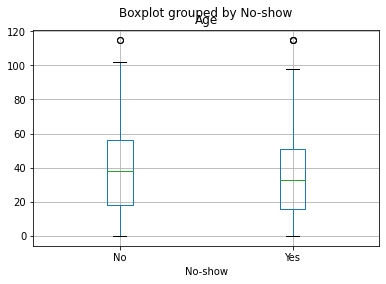

In [311]:
#Check Age distribution using box plot
df.boxplot(column='Age', by= 'No-show');

  **Spelling errors** - Correct spelling errors identified

In [312]:
#Rename the typo fields
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap' : 'Handicap' }, inplace = True)

**Check if the data is clean**

In [313]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AppointmentDay_of_week,days_to,Age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,-1,Elders
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,-1,Adults
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,-1,Elders
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,-1,Child
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,-1,Adults


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   PatientId               110526 non-null  object             
 1   AppointmentID           110526 non-null  object             
 2   Gender                  110526 non-null  object             
 3   ScheduledDay            110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay          110526 non-null  datetime64[ns, UTC]
 5   Age                     110526 non-null  int64              
 6   Neighbourhood           110526 non-null  object             
 7   Scholarship             110526 non-null  int64              
 8   Hypertension            110526 non-null  int64              
 9   Diabetes                110526 non-null  int64              
 10  Alcoholism              110526 non-null  int64              
 11  Handicap                11

<a id='eda'></a>
## Exploratory Data Analysis


**Define functions to avoid repetition**

In [315]:
#Ratio plot
def ratio(dataframe,group,values,):
    x=pd.DataFrame(dataframe.groupby(group)[values].count().sort_values(ascending=False).reset_index())
    x['ratio']=x.iloc[:,-1]/x.iloc[:,-1].sum()
    return x

**Review field statistics**

In [316]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,days_to
count,110526.00,110526.00,110526.00,110526.00,110526.00,110526.00,110526.00,110526.00
mean,37.09,0.10,0.20,0.07,0.03,0.02,0.32,9.18
std,23.11,0.30,0.40,0.26,0.17,0.16,0.47,15.26
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.00
25%,18.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00
50%,37.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,55.00,0.00,0.00,0.00,0.00,0.00,1.00,14.00
max,115.00,1.00,1.00,1.00,1.00,4.00,1.00,178.00


**Histogram Matrix Overview**

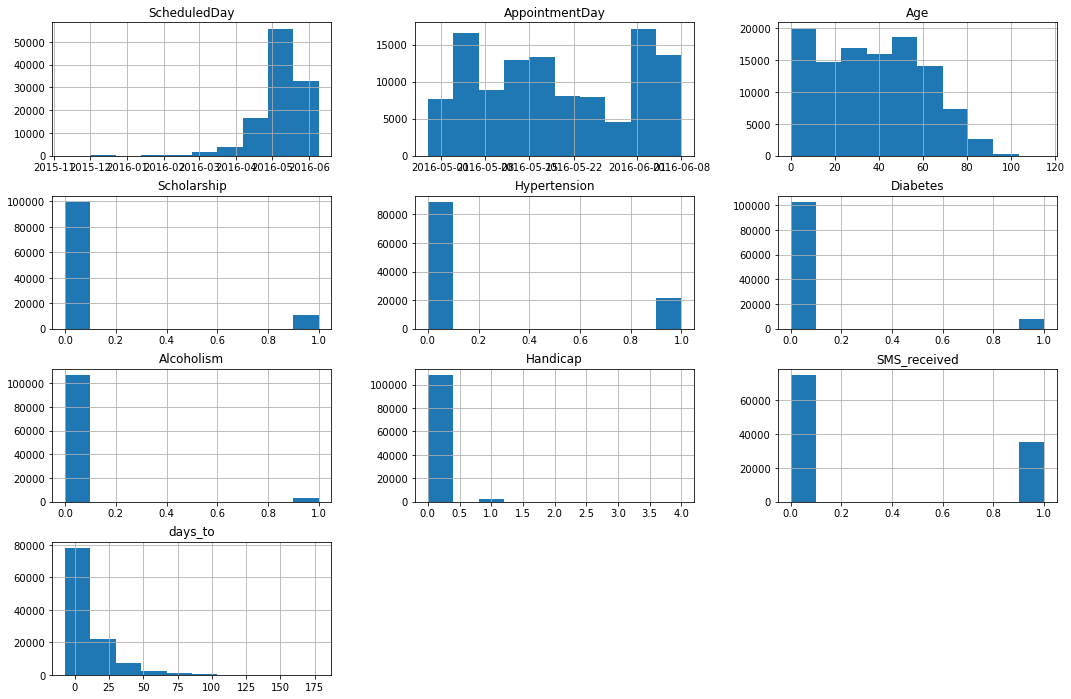

In [317]:
#Histogram Matrix to plot all numeric data for a whole view
df.hist(figsize=(18,12));

**Observations:**
>**Age**: Most of the patients appear to be below the age of 60, with the average being 37.09. Children appear to be dominant in the dataset

>**Handicap**: Handicap has a max of 4, this means there are different categories of Handicap but the data does not provide more details

> **Days_to**: The average number of days between Schedule and Appointment date is 9 days. There are some instances where the schedule date
is after the appointment date, which could indicate some human error in capturing. The min is -7, when we were expecting positive values
It is also surprising to see that some appointments were schedule almost 6 months in advance. The max is 178 days

> **Alcoholism**: This remains very low and probably has little impact on no-shows

> **Diabetes & Hypertension**: These two factors appear to have little significance as a few people have the conditions


In [318]:
ratio(df,['Age_group','No-show'],'AppointmentID')

,Age_group,No-show,AppointmentID,ratio
0,Adults,No,35135,0.32
1,Child,No,22519,0.20
2,Elders,No,17931,0.16
3,Young Adults,No,12622,0.11
4,Adults,Yes,8587,0.08
5,Child,Yes,6347,0.06
6,Young Adults,Yes,4143,0.04
7,Elders,Yes,3242,0.03


In [319]:
print('Percentage of No-show: ', "%.2f%%" % (df[df['No-show']=="Yes"].count().loc['No-show']/df['AppointmentID'].count()*100))
print('Percentage of Show-up: ', "%.2f%%" % (df[df['No-show']=="No"].count().loc['No-show']/df['AppointmentID'].count()*100))

Percentage of No-show:  20.19%
Percentage of Show-up:  79.81%


Approximately 80% of patients show up for their appointment

In [320]:
print('Percentage of patients with Hypertension: ', "%.2f%%" % (df[df['Hypertension']==1].count().loc['No-show']/df['PatientId'].count()*100))
print('Percentage of patients with NO Hypertension: ', "%.2f%%" % (df[df['Hypertension']==0].count().loc['No-show']/df['PatientId'].count()*100))

Percentage of patients with Hypertension:  19.72%
Percentage of patients with NO Hypertension:  80.28%


### Research Question 1 : Which Age Group and Gender has the biggest no shows?
> Does age have an impact on no-shows?

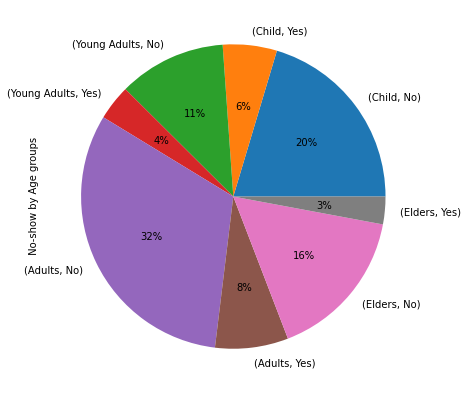

In [321]:
#Pie chart plot showing the age distribution
df.groupby(['Age_group','No-show'])['No-show'].count().plot(kind="pie", figsize=(7,7),autopct='%1.0f%%',label=' No-show by Age groups');

It appears that Adults contribute to the largest number of no shows, followed by children.

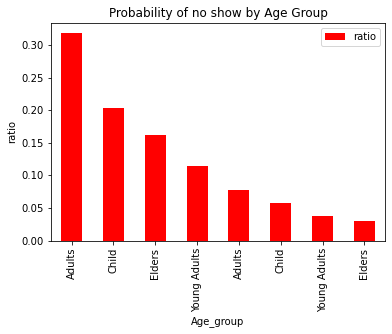

In [322]:
#Using the ratio function created earlier, lets look at ratio's (probabilities)
df_age_groups= ratio(df,['Age_group','No-show'],'AppointmentID')
df_age_groups.plot(kind='bar',x='Age_group', y='ratio', title='Probability of no show by Age Group', color='r', ylabel='ratio');

- The Adult and Child age group constitute 64% of the data set

- Child & Adult age group are dominant in the dataset, it is therefore expected that this age group will have a higher ratio

In [323]:
ratio(df,['Gender','No-show'],'PatientId')

,Gender,No-show,PatientId,ratio
0,F,No,57245,0.52
1,M,No,30962,0.28
2,F,Yes,14594,0.13
3,M,Yes,7725,0.07


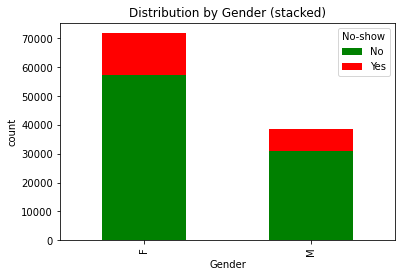

In [324]:
df.groupby(['Gender', 'No-show'])['PatientId'].count().unstack('No-show')\
    .plot( kind='bar', stacked=True, color=['g','r'],title='Distribution by Gender (stacked)',ylabel='count');

**Gender**

> Females contribute 13% of no-shows vs 7% for male from all appointments

### Research Question 2  - On which day of the week are people mostly likely to not show up?

In [325]:
#Create an index to sort the days of the week in order
df_dayOrder = pd.DataFrame({
    'AppointmentDay_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'order': [0, 1, 2, 3, 4, 5, 6]})
df = pd.merge(df, df_dayOrder, on='AppointmentDay_of_week')
df = df.sort_values('order')

In [326]:
#Using function created above, explore ratios
ratio(df,['AppointmentDay_of_week','No-show'],'AppointmentID')

,AppointmentDay_of_week,No-show,AppointmentID,ratio
0,Wednesday,No,20774,0.19
1,Tuesday,No,20488,0.19
2,Monday,No,18024,0.16
3,Friday,No,14982,0.14
4,Thursday,No,13909,0.13
5,Tuesday,Yes,5152,0.05
6,Wednesday,Yes,5093,0.05
7,Monday,Yes,4690,0.04
8,Friday,Yes,4037,0.04
9,Thursday,Yes,3338,0.03


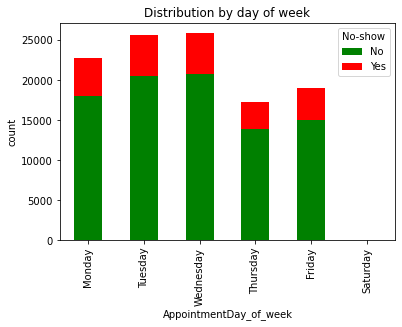

In [327]:
#bar plot of days distributions
df.groupby(['AppointmentDay_of_week', 'No-show'],sort=False)['AppointmentID'].count().unstack('No-show')\
    .plot( kind='bar', stacked=True, color=['g','r'], title='Distribution by day of week',ylabel='count');

**Day of week:**
- Tuesday & Wednesday appears to have the biggest number of no-show in proportion to other days of the week
- These two days also have the highest counts

### Research Question 3  - Which other factors influence no-shows?

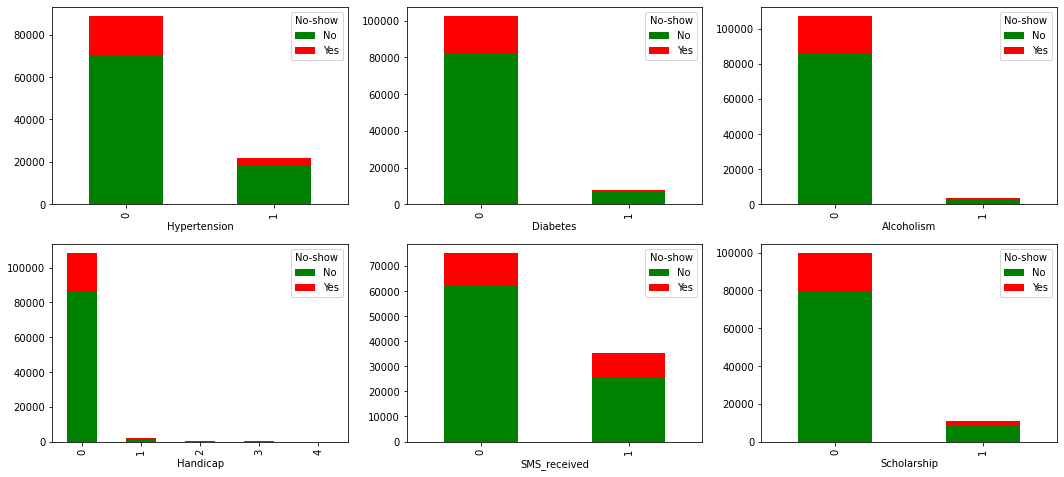

In [328]:
#Create a sub-plot matrix of other factors
factors = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Scholarship']

fig = plt.figure(figsize=(18, 8))
for i, factors in enumerate(factors):
    ax = fig.add_subplot(2, 3, i+1)
    df.groupby([factors, 'No-show'])[factors].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True, color=['g','r'])

In [329]:
#Let's look at the numbers
factors = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Scholarship']

for x in factors:
    print(df.groupby([x, 'No-show'])[x].count())

Hypertension  No-show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: Hypertension, dtype: int64
Diabetes  No-show
0         No         81694
          Yes        20889
1         No          6513
          Yes         1430
Name: Diabetes, dtype: int64
Alcoholism  No-show
0           No         85524
            Yes        21642
1           No          2683
            Yes          677
Name: Alcoholism, dtype: int64
Handicap  No-show
0         No         86373
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: Handicap, dtype: int64
SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: SMS_received, dtype: int64
Sch

**Observation:**
> Looking at the plot matrix above, there is not a clear factor that significantly contributes to no show
> The SMS feature doesn't appear to be helping people honour their appointments either. It would be interesting if we could see SMS date
> None of the factors are useful for predicting no-show

<a id='conclusions'></a>
## Overall Conclusion
The dataset had a few issues, including significant outliers such as negative, the sample of these issues were very low and didn't skew the results after they were removed
Additional features were added to the dataset such as day of the week and age group categories which enabled my analysis to go deeper. The dataset contained limited information
and features for some variables that were explored, such as the time of the appointment, type of handicap etc.

The data covers a period of around 8 months, from November 2015 to June 2016. This limits our analysis to a particular point in time and there could be unexplored seasonal features

The dataset had limited features that have positive correlations, meaning that making any predictions or descriptive statistics will not generate conclusive results. Since this was
an investigation of the dataset, I couldn't supplement the data with other publicly available information about the neighbourhoods and demographics of Brazil for more meaningful analysis

<u>In this analysis we looked at the following variables and the following key observations were made:</u>
> **Age groups:** The adult and child age groups are the biggest driver of no-shows.
> **Gender:** About two thirds of the population consists of female.
> **Day of the week:** Tuesdays and Wednesdays are very popular appointments. No appointments on Sundays and only 9 appointments on Saturday
> **Days between schedule and Appointment date:** Appointments that are scheduled well in advance, i.e. at least 10 days before appointment date have a lower no-show prevalence
> **SMS received feature:** The SMS feature is only used on 32% of the total population, making it an insignificant driver of no-shows
> **Diseases:** The disease features appear to have little influence on no-shows. Handicaps have 4 types that were not named


Each of the variables considered above do have some form of contributing factor to no-shows, however the distance between each variable is not big.
This suggests that it is very difficult to predict with high accuracy, whether patients will show up given the dataset.